In [28]:
pacman::p_load(tidyverse, reshape2, ggthemes, scales, plotly)
source('ggplot_theme_Publication-2.R')

In [20]:
df <- read.csv('MB2_TOPUP_MOBILE.csv', sep = "|")
df <- df %>% mutate_at(vars(contains('DATE')), ~(as.Date(., '%m/%d/%Y')))
head(df)

,CLIENT_NO,IB_REGISTERED_DATE2,TRAN_DATE,TRAN_AMOUNT
,<int>,<date>,<date>,<int>
1,190011,2012-11-21,2022-07-14,300000
2,190011,2012-11-21,2022-07-11,100000
3,190011,2012-11-21,2022-08-08,100000
4,190011,2012-11-21,2022-08-05,100000
5,190011,2012-11-21,2022-10-28,485000
6,190011,2012-11-21,2022-11-10,291000


In [21]:
cam_date <- as.Date('14/9/2022', '%d/%m/%Y')
mod_date <- as.Date('1/10/2022', '%d/%m/%Y')
mod_date_ <- as.Date('1/11/2022', '%d/%m/%Y')
before <- df %>% filter(TRAN_DATE < cam_date)
after <- df %>% filter(TRAN_DATE >= cam_date)

# MODEL PERFORMANCE

In [14]:
# EXPECTATION
model1_ls_10 <- read.csv('VIB20_CLIENT_FILE_FOR_TOPUP_28SEP.csv')
model2_ls_11 <- read.csv('VIB20_TOPUPv2_POTENTIAL_2022_11.csv')
model1_ls_11 <- read.csv('VIB20_CLIENT_FILE_FOR_TOPUP_22_11_02.csv')

In [22]:
performance <- data.frame(Model = NA,
                            Month = NA,
                          Export = NA,
                          Match = NA)
performance <- rbind(performance, data.frame(Model = 'Model 1', 
                                            Month = 'OCT 2022',
                                            Export = nrow(model1_ls_10),
                                            Match = nrow(inner_join(model1_ls_10, after %>% filter(TRAN_DATE >= mod_date), on = 'CLIENT_NO') %>% select(CLIENT_NO) %>% unique())))
performance <- rbind(performance, data.frame(Model = 'Model 1', 
                                            Month = 'NOV 2022',
                                            Export = nrow(model1_ls_11),
                                            Match = nrow(inner_join(model1_ls_11, after %>% filter(TRAN_DATE >= mod_date_), on = 'CLIENT_NO') %>% select(CLIENT_NO) %>% unique())))
                                            
performance <- rbind(performance, data.frame(Model = 'Model 2', 
                                            Month = 'NOV 2022',
                                            Export = nrow(model2_ls_11),
                                            Match = nrow(inner_join(model2_ls_11, after %>% filter(TRAN_DATE >= mod_date_), on = 'CLIENT_NO') %>% select(CLIENT_NO) %>% unique())))
performance <- na.omit(performance)
performance <- performance %>% mutate(Precision = Match / Export)
performance


Joining, by = "CLIENT_NO"

Joining, by = "CLIENT_NO"

Joining, by = "CLIENT_NO"



,Model,Month,Export,Match,Precision
,<chr>,<chr>,<int>,<int>,<dbl>
2,Model 1,OCT 2022,18157,10809,0.5953076
3,Model 1,NOV 2022,31866,19582,0.6145108
4,Model 2,NOV 2022,87896,21908,0.2492491


Using Month as id variables



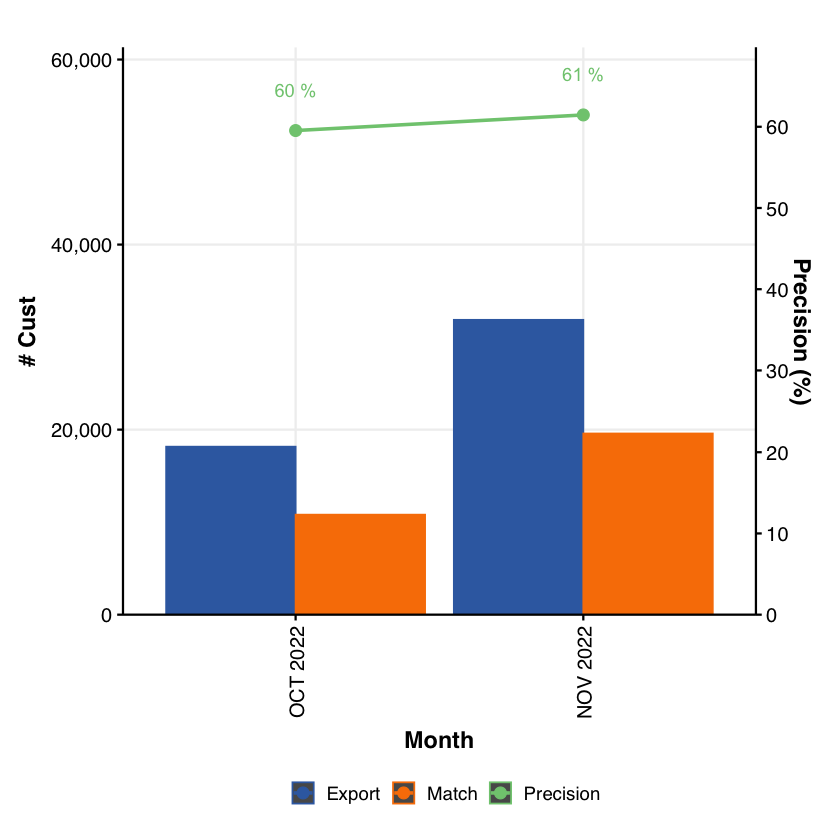

In [63]:
y_max <- max(performance %>% select(is.numeric))
scaleRight <- 100 / y_max
plot1 <- ggplot(melt(performance %>% filter(Model == 'Model 1') %>% select(-Precision, -Model) %>% mutate(Month = factor(Month, levels = c('OCT 2022', 'NOV 2022')))), aes(x = Month)) +
    geom_bar(aes(y = value, fill = variable, color = variable),  stat = 'identity', position = "dodge") +
    geom_point(data = performance %>% filter(Model == 'Model 1'), aes( y = Precision * 100 / scaleRight, group = 1, color = 'Precision'), size = 3) +
    geom_line(data = performance %>% filter(Model == 'Model 1'), aes( y = Precision * 100 / scaleRight, group = 1, color = 'Precision'), size = 1) +
    geom_text(data = performance %>% filter(Model == 'Model 1'), aes(y = (Precision * 100 + 5) / scaleRight , label = paste(round(Precision,2)*100, '%'), color = 'Precision'),show.legend=F) +
    # scale_color_manual(values = c('black')) +
    scale_y_continuous(labels = comma, expand = expansion(mult = c(0,.05)),
                    sec.axis = sec_axis(~.*scaleRight, name = "Precision (%)",
                                        breaks=seq(0,100,10))) +
    # theme_classic() +
    scale_fill_Publication() + 
    scale_colour_Publication()+
    theme_Publication() +
    guides(color = guide_legend(nrow = 1),fill="none") +
    labs( y="# Cust", x="Month") +
    theme(axis.text.x = element_text(angle=90, vjust=0.6),
        axis.text=element_text(size=12),
        axis.title=element_text(size=14,face="bold"),
        legend.background = element_rect(fill = "transparent"), 
      legend.box.background = element_rect(fill = "transparent", colour = NA),
      legend.key = element_rect(fill = "transparent"), 
      legend.spacing = unit(-1, "lines"),
      legend.title=element_blank(), plot.title = element_text(face="bold", size = 20))
plot1

Using Month as id variables

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?



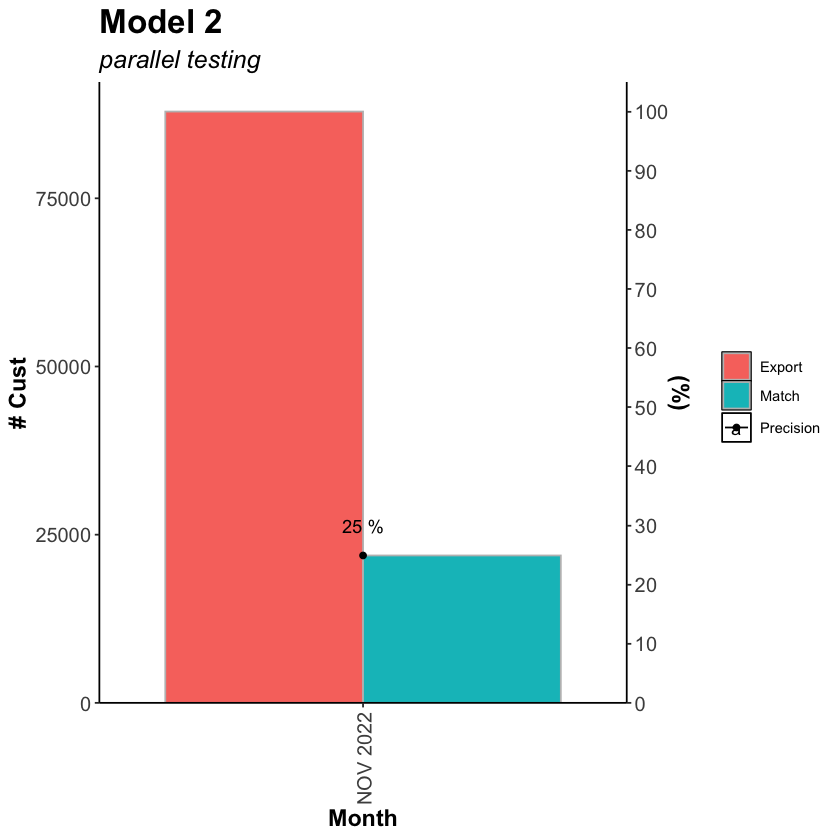

In [72]:
ggplot(melt(performance %>% filter(Model == 'Model 2') %>% select(-Precision, -Model)), aes(x = factor(Month, levels = c('OCT 2022', 'NOV 2022')))) +
    geom_bar(aes(y = value, fill = variable), color = 'grey',  stat = 'identity', position = "dodge") +
    # scale_fill_manual(values=c('#CFFDE1','#68B984')) +
    # scale_fill_grey() +
    geom_point(data = performance %>% filter(Model == 'Model 2'), aes( y = Precision * 100 / scaleRight, group = 1, color = 'Precision')) +
    geom_line(data = performance %>% filter(Model == 'Model 2'), aes( y = Precision * 100 / scaleRight, group = 1, color = 'Precision')) +
    geom_text(data = performance %>% filter(Model == 'Model 2'), aes(y = (Precision * 100 + 5) / scaleRight , label = paste(round(Precision,2)*100, '%'), color = 'Precision')) +
    scale_color_manual(values = c('black')) +
    scale_y_continuous(expand = expansion(mult = c(0,.05)),
                    sec.axis = sec_axis(~.*scaleRight, name = "(%)",
                                        breaks=seq(0,100,10))) +
    theme_classic() +
    labs( y="# Cust", x="Month", title = 'Model 2', subtitle = 'parallel testing') +
    theme(axis.text.x = element_text(angle=90, vjust=0.6),
        axis.text=element_text(size=12),
        axis.title=element_text(size=14,face="bold"),
        legend.background = element_rect(fill = "transparent"), 
      legend.box.background = element_rect(fill = "transparent", colour = NA),
      legend.key = element_rect(fill = "transparent"), 
      legend.spacing = unit(-1, "lines"),
      legend.title=element_blank(), plot.title = element_text(face="bold", size = 20), plot.subtitle = element_text(face="italic", size = 15))

Using Month as id variables

Using Month as id variables

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?



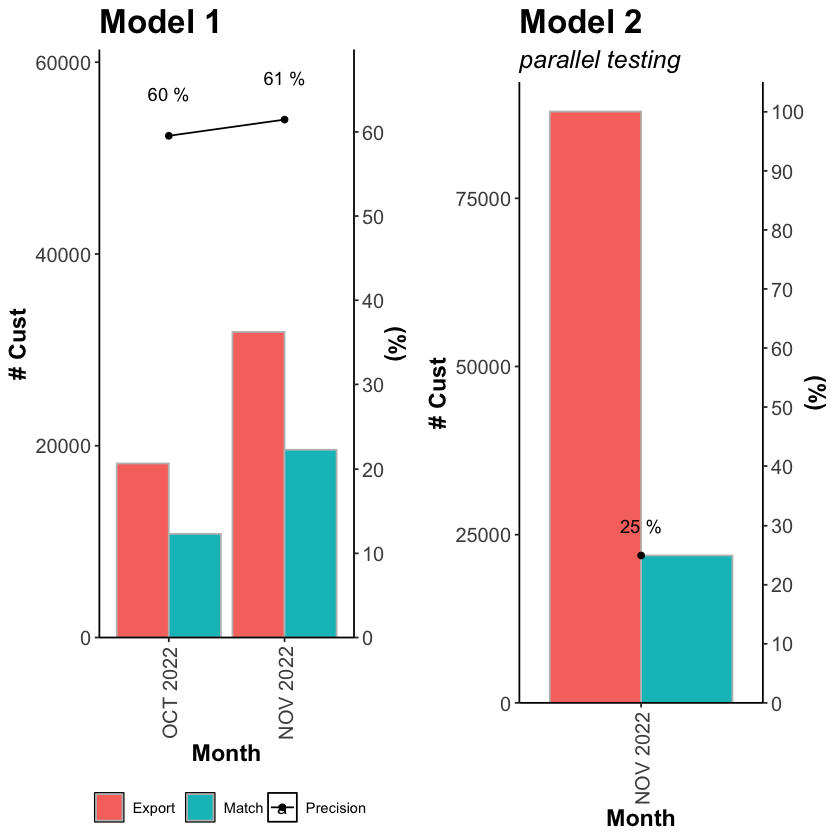

In [192]:
y_max <- max(performance %>% select(is.numeric))
scaleRight <- 100 / y_max
plot1 <- ggplot(melt(performance %>% filter(Model == 'Model 1') %>% select(-Precision, -Model)), aes(x = factor(Month, levels = c('OCT 2022', 'NOV 2022')))) +
    geom_bar(aes(y = value, fill = variable), color = 'grey',  stat = 'identity', position = "dodge") +
    # scale_fill_manual(values=c('#CFFDE1','#68B984')) +
    # scale_fill_grey() +
    geom_point(data = performance %>% filter(Model == 'Model 1'), aes( y = Precision * 100 / scaleRight, group = 1, color = 'Precision')) +
    geom_line(data = performance %>% filter(Model == 'Model 1'), aes( y = Precision * 100 / scaleRight, group = 1, color = 'Precision')) +
    geom_text(data = performance %>% filter(Model == 'Model 1'), aes(y = (Precision * 100 + 5) / scaleRight , label = paste(round(Precision,2)*100, '%'), color = 'Precision')) +
    scale_color_manual(values = c('black')) +
    scale_y_continuous(expand = expansion(mult = c(0,.05)),
                    sec.axis = sec_axis(~.*scaleRight, name = "(%)",
                                        breaks=seq(0,100,10))) +
    theme_classic() +
    labs( y="# Cust", x="Month", title = 'Model 1') +
    theme(axis.text.x = element_text(angle=90, vjust=0.6),
        axis.text=element_text(size=12),
        axis.title=element_text(size=14,face="bold"),
        legend.background = element_rect(fill = "transparent"), 
      legend.box.background = element_rect(fill = "transparent", colour = NA),
      legend.key = element_rect(fill = "transparent"), 
      legend.spacing = unit(-1, "lines"),
      legend.title=element_blank(), plot.title = element_text(face="bold", size = 20), legend.position = 'bottom')
plot2 <- ggplot(melt(performance %>% filter(Model == 'Model 2') %>% select(-Precision, -Model)), aes(x = factor(Month, levels = c('OCT 2022', 'NOV 2022')))) +
    geom_bar(aes(y = value, fill = variable), color = 'grey',  stat = 'identity', position = "dodge") +
    # scale_fill_manual(values=c('#CFFDE1','#68B984')) +
    # scale_fill_grey() +
    geom_point(data = performance %>% filter(Model == 'Model 2'), aes( y = Precision * 100 / scaleRight, group = 1, color = 'Precision')) +
    geom_line(data = performance %>% filter(Model == 'Model 2'), aes( y = Precision * 100 / scaleRight, group = 1, color = 'Precision')) +
    geom_text(data = performance %>% filter(Model == 'Model 2'), aes(y = (Precision * 100 + 5) / scaleRight , label = paste(round(Precision,2)*100, '%'), color = 'Precision')) +
    scale_color_manual(values = c('black')) +
    scale_y_continuous(expand = expansion(mult = c(0,.05)),
                    sec.axis = sec_axis(~.*scaleRight, name = "(%)",
                                        breaks=seq(0,100,10))) +
    theme_classic() +
    labs( y="# Cust", x="Month", title = 'Model 2', subtitle = 'parallel testing') +
    theme(axis.text.x = element_text(angle=90, vjust=0.6),
        axis.text=element_text(size=12),
        axis.title=element_text(size=14,face="bold"),
        legend.background = element_rect(fill = "transparent"), 
      legend.box.background = element_rect(fill = "transparent", colour = NA),
      legend.key = element_rect(fill = "transparent"), 
      legend.spacing = unit(-1, "lines"),
      legend.position = 'none', plot.title = element_text(face="bold", size = 20), plot.subtitle = element_text(face="italic", size = 15))
grid.arrange(plot1, plot2, ncol=2)

# CAMPAIGN PERFORMANCE

## EXISTING CUSTOMERS

## Average transaction frequency

In [64]:
before <- before %>% mutate(TIME = format(TRAN_DATE, "%Y-%m"))
after <- after %>% mutate(TIME = format(TRAN_DATE, "%Y-%m"))

In [65]:
tmp <- before %>% group_by(TIME , CLIENT_NO) %>% summarise(n = n()) %>% group_by(TIME) %>% summarise(ATF = mean(n))
tmp_<- after %>% group_by(TIME , CLIENT_NO) %>% summarise(n = n()) %>% group_by(TIME) %>% summarise(ATF = mean(n))
tmp_

`summarise()` has grouped output by 'TIME'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'TIME'. You can override using the `.groups` argument.



TIME,ATF
<chr>,<dbl>
2022-09,1.923584
2022-10,2.444921
2022-11,2.412934


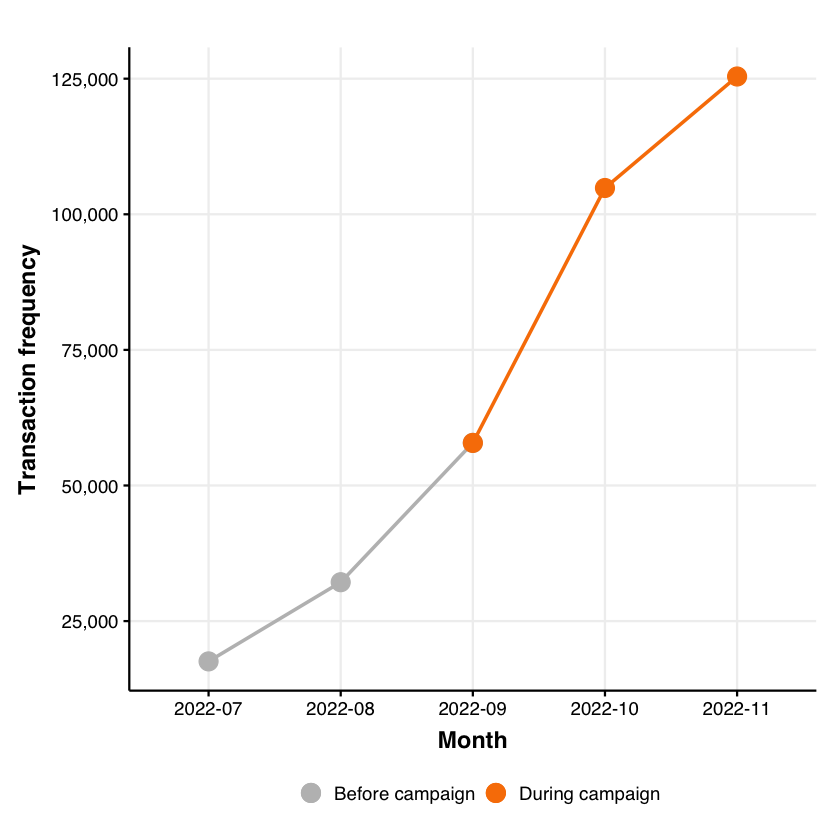

In [75]:
tmp <- df %>% mutate(TIME = format(TRAN_DATE, "%Y-%m")) %>%  
                group_by(TIME) %>% 
                summarise(ATF = n())
ggplot() + 
geom_line(data = tmp %>% filter(TIME %in% c('2022-07','2022-08','2022-09')), aes(x = TIME, y = ATF, group = 1, color = 'Before campaign'), size = 1) +
geom_point(data = tmp %>% filter(TIME %in% c('2022-07','2022-08','2022-09')), aes(x = TIME, y = ATF, group = 1, color = 'Before campaign'), size = 5) +
geom_line(data = tmp %>% filter(TIME %in% c('2022-09','2022-10','2022-11')), aes(x = TIME, y = ATF, group = 1, color = 'During campaign'), size = 1) +
geom_point(data = tmp %>% filter(TIME %in% c('2022-09','2022-10','2022-11')), aes(x = TIME, y = ATF, group = 1, color = 'During campaign'), size = 5) +
scale_y_continuous(labels = comma) +
labs(x = 'Month', y = 'Transaction frequency') +
theme_Publication() +
scale_color_manual(values = c('grey','#f87f01')) + 
theme(legend.title = element_blank())



## Average elapse between consecutive transactions

In [80]:
head(df)

,CLIENT_NO,IB_REGISTERED_DATE2,TRAN_DATE,TRAN_AMOUNT
,<int>,<date>,<date>,<int>
1,190011,2012-11-21,2022-07-14,300000
2,190011,2012-11-21,2022-07-11,100000
3,190011,2012-11-21,2022-08-08,100000
4,190011,2012-11-21,2022-08-05,100000
5,190011,2012-11-21,2022-10-28,485000
6,190011,2012-11-21,2022-11-10,291000


In [104]:
tmp <- df %>% filter(CLIENT_NO == 10470) %>% arrange(TRAN_DATE)
# tmp <- tmp[order(tmp$TRAN_DATE, decreasing = FALSE),]

In [105]:
tmp

CLIENT_NO,IB_REGISTERED_DATE2,TRAN_DATE,TRAN_AMOUNT
<int>,<date>,<date>,<int>
10470,2015-01-06,2022-10-12,4850000
10470,2015-01-06,2022-10-24,4850000


In [108]:
tmp_func <- function(vec) {
    if (length(vec) > 1){
        return(as.numeric(mean(diff(vec))))
    } else {
        return(0)
    }
}

In [107]:
as.numeric(tmp_func(tmp$TRAN_DATE))

[1] 12

In [113]:
head(df %>% mutate(TIME = format(TRAN_DATE, "%Y-%m")))

,CLIENT_NO,IB_REGISTERED_DATE2,TRAN_DATE,TRAN_AMOUNT,TIME
,<int>,<date>,<date>,<int>,<chr>
1,190011,2012-11-21,2022-07-14,300000,2022-07
2,190011,2012-11-21,2022-07-11,100000,2022-07
3,190011,2012-11-21,2022-08-08,100000,2022-08
4,190011,2012-11-21,2022-08-05,100000,2022-08
5,190011,2012-11-21,2022-10-28,485000,2022-10
6,190011,2012-11-21,2022-11-10,291000,2022-11


In [116]:
TMP <- df %>% mutate(TIME = format(TRAN_DATE, "%Y-%m")) %>% 
        group_by(TIME,CLIENT_NO, TRAN_DATE) %>% 
        arrange(TRAN_DATE) %>% 
        group_by(TIME, CLIENT_NO) %>% 
        summarise(Dif = tmp_func(TRAN_DATE)) %>%
        group_by(TIME) %>%
        summarise(ADif = mean(Dif))

`summarise()` has grouped output by 'TIME'. You can override using the `.groups` argument.



In [ ]:
TMP

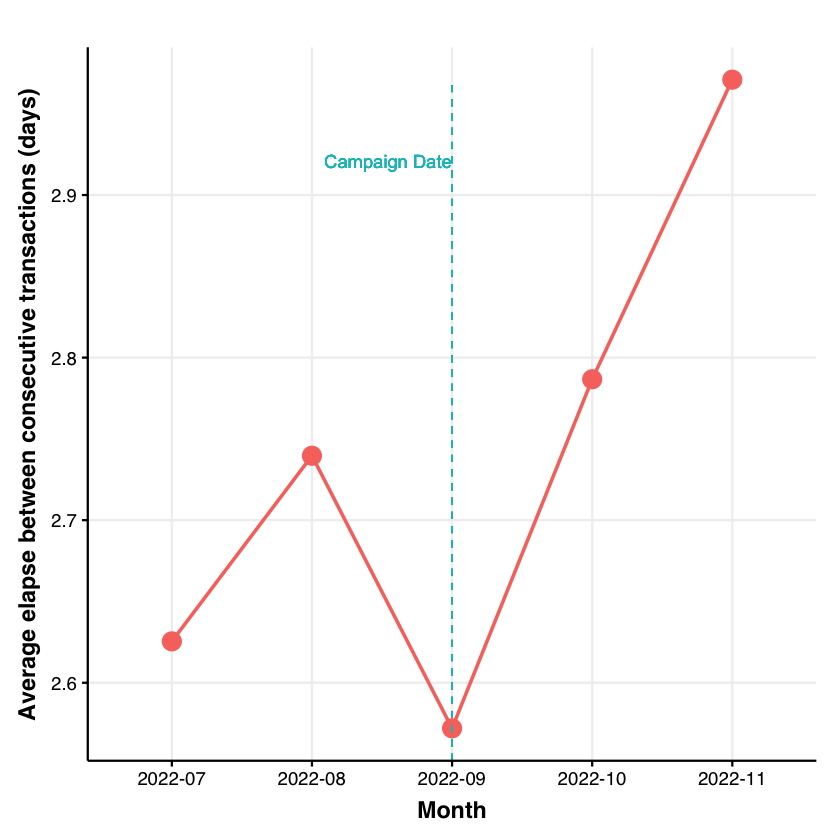

In [119]:
ggplot(TMP) + 
geom_line(aes(x = TIME, y = ADif, group = 1, color = 'Avg'), size = 1) +
geom_point(aes(x = TIME, y = ADif, group = 1, color = 'Avg'), size = 5) +
geom_segment(aes(x = '2022-09', xend = '2022-09',y=-Inf, yend = max(ADif), color = 'Campaign Date'), linetype = 'dashed') +
geom_text(aes(x = '2022-09', y = max(ADif) - 0.05, label = 'Campaign Date', color = 'Campaign Date'), hjust = 1) +
labs(x = 'Month', y = 'Average elapse between consecutive transactions (days)') +
scale_fill_Publication() + 
theme_Publication() +
theme(legend.position = 'none')

## Average transaction frequency per customer

In [120]:
head(df)

,CLIENT_NO,IB_REGISTERED_DATE2,TRAN_DATE,TRAN_AMOUNT
,<int>,<date>,<date>,<int>
1,190011,2012-11-21,2022-07-14,300000
2,190011,2012-11-21,2022-07-11,100000
3,190011,2012-11-21,2022-08-08,100000
4,190011,2012-11-21,2022-08-05,100000
5,190011,2012-11-21,2022-10-28,485000
6,190011,2012-11-21,2022-11-10,291000


In [ ]:
tmp <- df %>% mutate(TIME = format(TRAN_DATE, "%Y-%m")) %>%
                group_by(CLIENT_NO, TIME) %>%
                summarise(n = n()) 

## Wonback ratio

In [123]:
head(df)

,CLIENT_NO,IB_REGISTERED_DATE2,TRAN_DATE,TRAN_AMOUNT
,<int>,<date>,<date>,<int>
1,190011,2012-11-21,2022-07-14,300000
2,190011,2012-11-21,2022-07-11,100000
3,190011,2012-11-21,2022-08-08,100000
4,190011,2012-11-21,2022-08-05,100000
5,190011,2012-11-21,2022-10-28,485000
6,190011,2012-11-21,2022-11-10,291000


In [146]:
tmp <- df %>% mutate(TIME = format(TRAN_DATE, "%Y-%m")) %>%
            group_by(TIME, CLIENT_NO) %>%
            summarise(Total = n(), Subtotal = n()-1) %>%
            mutate(WR = Subtotal / Total) %>% group_by(TIME) %>% summarise(WR = mean(WR))

`summarise()` has grouped output by 'TIME'. You can override using the `.groups` argument.



In [147]:
head(tmp)

TIME,WR
<chr>,<dbl>
2022-07,0.3044978
2022-08,0.3039450
2022-09,0.3179350
2022-10,0.3480688
2022-11,0.3445277


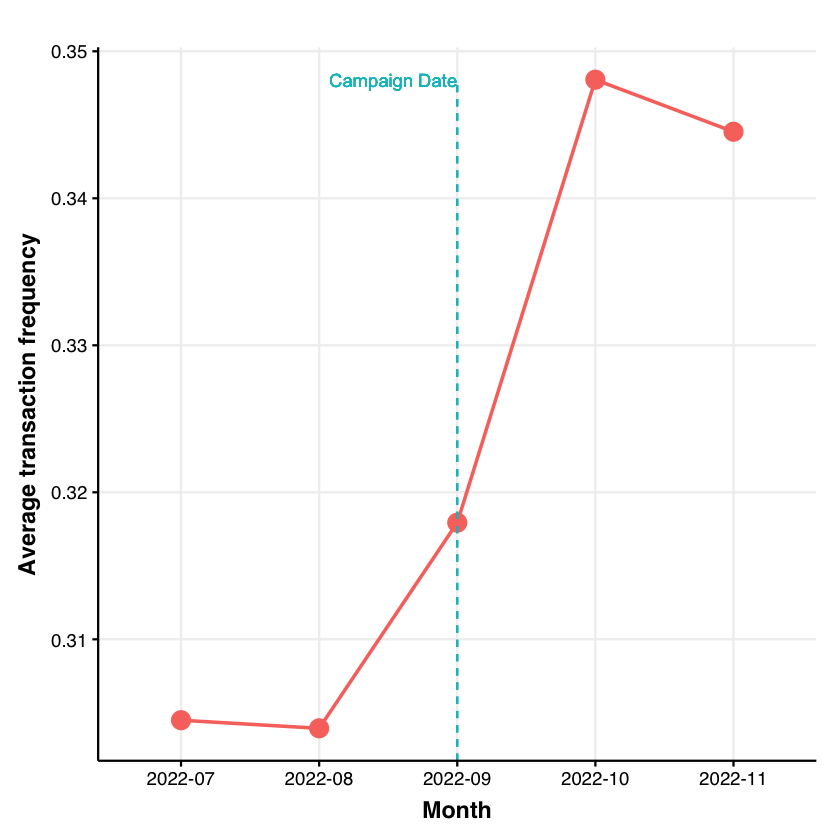

In [149]:
ggplot(tmp) + 
geom_line(aes(x = TIME, y = WR, group = 1, color = 'Avg'), size = 1) +
geom_point(aes(x = TIME, y = WR, group = 1, color = 'Avg'), size = 5) +
geom_segment(aes(x = '2022-09', xend = '2022-09',y=-Inf, yend = max(WR), color = 'Campaign Date'), linetype = 'dashed') +
geom_text(aes(x = '2022-09', y = max(WR), label = 'Campaign Date', color = 'Campaign Date'), hjust = 1) +
labs(x = 'Month', y = 'Wonback ratio') +
scale_fill_Publication() + 
theme_Publication() +
theme(legend.position = 'none')

## Topup amount

In [150]:
head(df)

,CLIENT_NO,IB_REGISTERED_DATE2,TRAN_DATE,TRAN_AMOUNT
,<int>,<date>,<date>,<int>
1,190011,2012-11-21,2022-07-14,300000
2,190011,2012-11-21,2022-07-11,100000
3,190011,2012-11-21,2022-08-08,100000
4,190011,2012-11-21,2022-08-05,100000
5,190011,2012-11-21,2022-10-28,485000
6,190011,2012-11-21,2022-11-10,291000


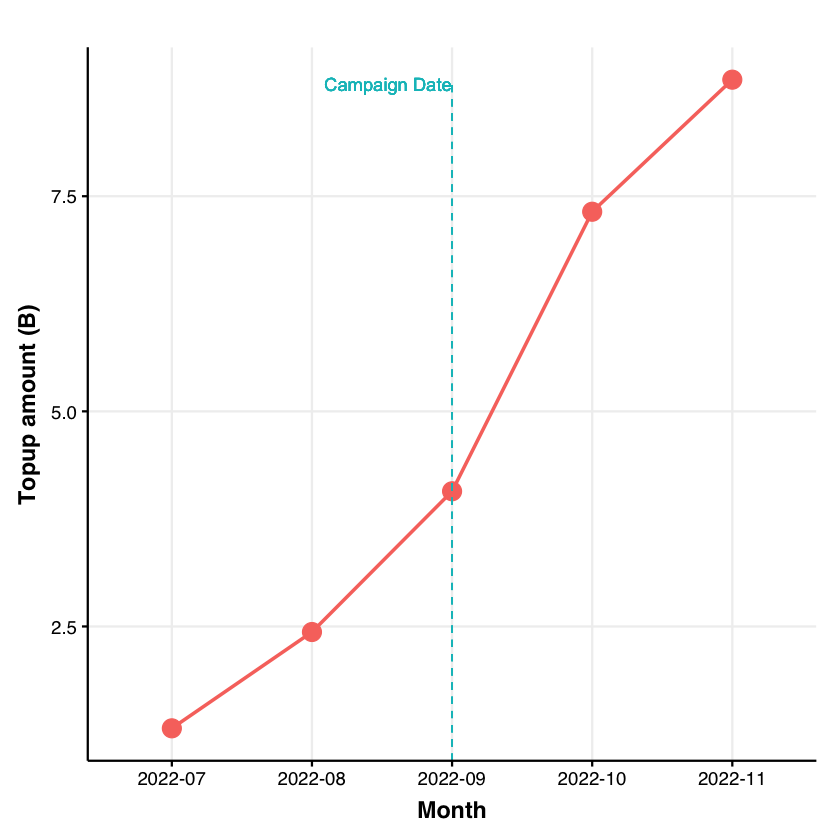

In [154]:
tmp <- df %>% mutate(TIME = format(TRAN_DATE, "%Y-%m")) %>%  
                group_by(TIME) %>% 
                summarise(ATF = sum(TRAN_AMOUNT)/10^9)
ggplot(tmp) + 
geom_line(aes(x = TIME, y = ATF, group = 1, color = 'Avg'), size = 1) +
geom_point(aes(x = TIME, y = ATF, group = 1, color = 'Avg'), size = 5) +
geom_segment(aes(x = '2022-09', xend = '2022-09',y=-Inf, yend = max(ATF), color = 'Campaign Date'), linetype = 'dashed') +
geom_text(aes(x = '2022-09', y = max(ATF) - 0.05, label = 'Campaign Date', color = 'Campaign Date'), hjust = 1) +
labs(x = 'Month', y = 'Topup amount (B)') +
scale_fill_Publication() + 
theme_Publication() +
theme(legend.position = 'none')

## Average Topup amount per cust

`summarise()` has grouped output by 'TIME'. You can override using the `.groups` argument.



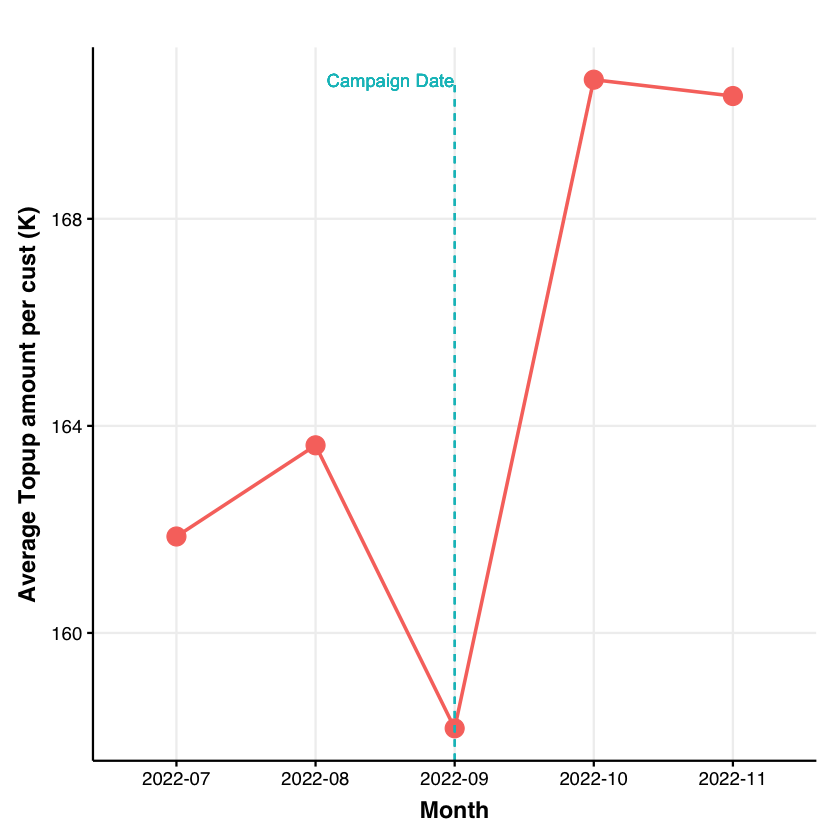

In [158]:
tmp <- df %>% mutate(TIME = format(TRAN_DATE, "%Y-%m")) %>%  group_by(TIME , CLIENT_NO) %>% summarise(n = sum(TRAN_AMOUNT)/10^3) %>% group_by(TIME) %>% summarise(ATF = mean(n))
ggplot(tmp) + 
geom_line(aes(x = TIME, y = ATF, group = 1, color = 'Avg'), size = 1) +
geom_point(aes(x = TIME, y = ATF, group = 1, color = 'Avg'), size = 5) +
geom_segment(aes(x = '2022-09', xend = '2022-09',y=-Inf, yend = max(ATF), color = 'Campaign Date'), linetype = 'dashed') +
geom_text(aes(x = '2022-09', y = max(ATF), label = 'Campaign Date', color = 'Campaign Date'), hjust = 1) +
labs(x = 'Month', y = 'Average Topup amount per cust (K)') +
scale_fill_Publication() + 
theme_Publication() +
theme(legend.position = 'none')

## Acquisition performance

In [160]:
head(df)

,CLIENT_NO,IB_REGISTERED_DATE2,TRAN_DATE,TRAN_AMOUNT
,<int>,<date>,<date>,<int>
1,190011,2012-11-21,2022-07-14,300000
2,190011,2012-11-21,2022-07-11,100000
3,190011,2012-11-21,2022-08-08,100000
4,190011,2012-11-21,2022-08-05,100000
5,190011,2012-11-21,2022-10-28,485000
6,190011,2012-11-21,2022-11-10,291000


In [162]:
tmp <- df %>% filter(TRAN_DATE >= cam_date) %>% 
                mutate(TIME = format(TRAN_DATE, "%Y-%m")) %>% 
                group_by(TIME, CLIENT_NO) %>% 
                summarise(first = min(TRAN_DATE)) #%>%
                # mutate(Ratio = (first - cam_date) / (first - IB_REGISTERED_DATE2))
head(tmp)

`summarise()` has grouped output by 'TIME'. You can override using the `.groups` argument.



TIME,CLIENT_NO,first
<chr>,<int>,<date>
2022-09,10673,2022-09-23
2022-09,10946,2022-09-19
2022-09,12102,2022-09-22
2022-09,12233,2022-09-20
2022-09,12247,2022-09-19
2022-09,16641,2022-09-14


In [163]:
tmp <- left_join(tmp, df %>% select(CLIENT_NO, IB_REGISTERED_DATE2) %>% unique(), )
head(tmp)

Joining, by = "CLIENT_NO"



TIME,CLIENT_NO,first,IB_REGISTERED_DATE2
<chr>,<int>,<date>,<date>
2022-09,10673,2022-09-23,2022-07-08
2022-09,10946,2022-09-19,2022-06-07
2022-09,12102,2022-09-22,2022-08-29
2022-09,12233,2022-09-20,2012-11-21
2022-09,12247,2022-09-19,2012-11-13
2022-09,16641,2022-09-14,2022-07-22


In [166]:
tmp <- tmp %>% ungroup() %>% mutate(Ratio = as.numeric(first - cam_date) / as.numeric(first - IB_REGISTERED_DATE2))
head(tmp)

TIME,CLIENT_NO,first,IB_REGISTERED_DATE2,Ratio
<chr>,<int>,<date>,<date>,<dbl>
2022-09,10673,2022-09-23,2022-07-08,0.116883117
2022-09,10946,2022-09-19,2022-06-07,0.048076923
2022-09,12102,2022-09-22,2022-08-29,0.333333333
2022-09,12233,2022-09-20,2012-11-21,0.001671309
2022-09,12247,2022-09-19,2012-11-13,0.001390047
2022-09,16641,2022-09-14,2022-07-22,0.000000000


In [183]:
df %>% filter(CLIENT_NO == 21966)

CLIENT_NO,IB_REGISTERED_DATE2,TRAN_DATE,TRAN_AMOUNT
<int>,<date>,<date>,<int>
21966,2022-09-21,2022-10-12,9700
21966,2022-09-21,2022-09-24,9700
21966,2022-09-21,2022-10-29,9700
21966,2022-09-21,2022-11-13,9700


In [180]:
tmp %>% filter(!is.na(tmp),!is.infinite(Ratio)) %>% group_by(TIME) %>% summarise(Ratio = mean(Ratio, na.rm = TRUE))

TIME,Ratio
<chr>,<dbl>
2022-09,0.5571984
2022-10,2.1983436
2022-11,2.6066943


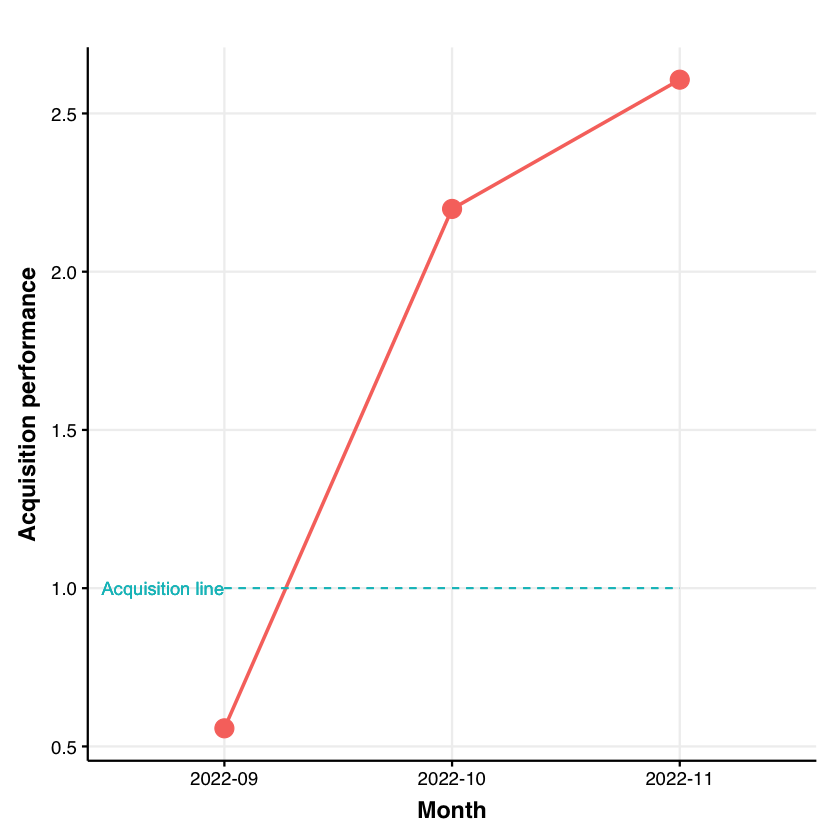

In [186]:
tmp %>% filter(!is.na(tmp),!is.infinite(Ratio)) %>% group_by(TIME) %>% summarise(Ratio = mean(Ratio, na.rm = TRUE)) %>%
ggplot() +
geom_line(aes(x = TIME, y = Ratio, group = 1, color = 'Avg'), size = 1) +
geom_point(aes(x = TIME, y = Ratio, group = 1, color = 'Avg'), size = 5) +
geom_segment(aes(x = '2022-09', xend = '2022-11',y=1, yend = 1, color = 'Line'), linetype = 'dashed') +
geom_text(aes(x = '2022-09', y = 1, label = 'Acquisition line', color = 'Line'), hjust = 1) +
labs(x = 'Month', y = 'Acquisition performance') +
scale_fill_Publication() + 
theme_Publication() +
theme(legend.position = 'none')

Warning message:
"Removed 1 row(s) containing missing values (geom_path)."
Warning message:
"Removed 1 rows containing missing values (geom_point)."
Warning message:
"Removed 3 rows containing missing values (geom_segment)."
Warning message:
"Removed 3 rows containing missing values (geom_text)."


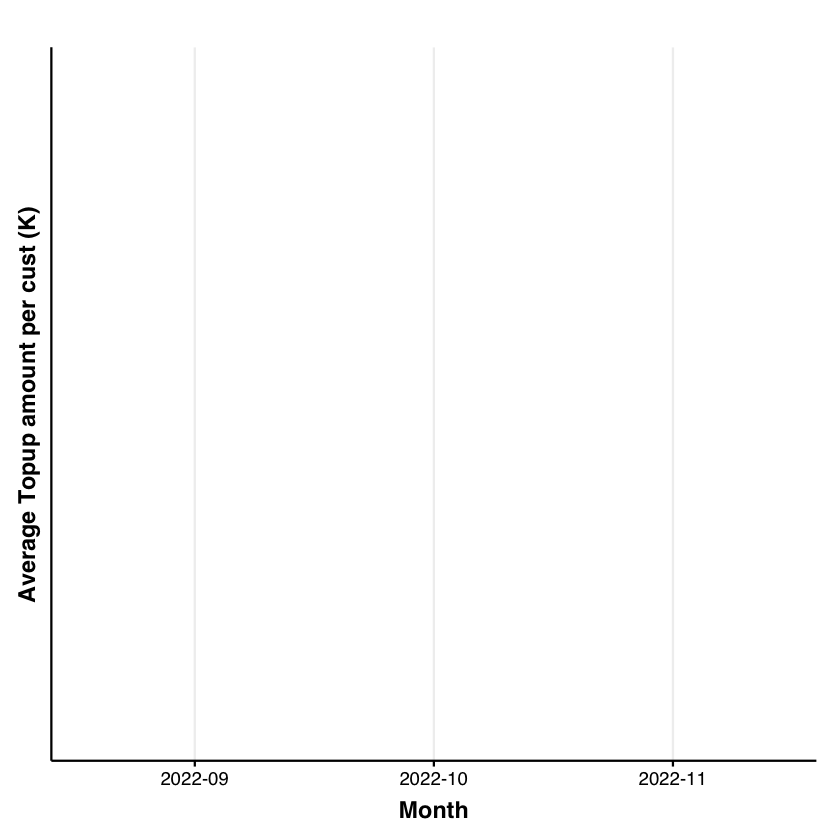

In [167]:
tmp %>% group_by(TIME) %>% summarise(Ratio = mean(Ratio)) %>%
ggplot() +
geom_line(aes(x = TIME, y = Ratio, group = 1, color = 'Avg'), size = 1) +
geom_point(aes(x = TIME, y = Ratio, group = 1, color = 'Avg'), size = 5) +
geom_segment(aes(x = '2022-09', xend = '2022-09',y=-Inf, yend = max(Ratio), color = 'Campaign Date'), linetype = 'dashed') +
geom_text(aes(x = '2022-09', y = max(Ratio), label = 'Campaign Date', color = 'Campaign Date'), hjust = 1) +
labs(x = 'Month', y = 'Average Topup amount per cust (K)') +
scale_fill_Publication() + 
theme_Publication() +
theme(legend.position = 'none')